## Important packages and load the CSV file

In [46]:
import numpy as np #linear algebra
import pandas as pd #data science
from scipy import stats #stats
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

In [47]:
# https://github.com/jonathan-data-analysis/ramen-ratings-analysis
df = pd.read_csv('https://raw.githubusercontent.com/jonathan-data-analysis/ramen-ratings-analysis/main/ramen-ratings.csv')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


## Clean and Prepare Data

In [48]:
# do we have any missing values?
df.isna().sum()

# top Ten data tells us if ramen != 'Top Ten', then it will be blank
# just drop the 2 values in Style

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [49]:
# drop the 2 values in Style
df = df.dropna(subset=['Style'])
# return number of missing values
print(df["Style"].isna().sum())

0


In [50]:
# confirmed
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
Top Ten     2537
dtype: int64

## Cup vs Bowl

In [51]:
# create a copy filtering only Bowl and convert the stars column into a float so you can do math
# Stars are currently object data types, which really means strings in Pandas, which can't do math
df_bowl = df[df['Style']=="Bowl"].copy()
df_bowl['Stars'] = pd.to_numeric(df_bowl['Stars'])
df_bowl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 13 to 2575
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  481 non-null    int64  
 1   Brand     481 non-null    object 
 2   Variety   481 non-null    object 
 3   Style     481 non-null    object 
 4   Country   481 non-null    object 
 5   Stars     481 non-null    float64
 6   Top Ten   1 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 30.1+ KB


In [52]:
# create a copy filtering only Cup and convert the stars column into a float so you can do math
# again, Stars are currently object data types, which really means strings but we need nubers to do math
df_cup = df.loc[df['Style']=="Cup"].copy()
df_cup['Stars']=pd.to_numeric(df_cup['Stars'])
df_cup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 2571
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  450 non-null    int64  
 1   Brand     450 non-null    object 
 2   Variety   450 non-null    object 
 3   Style     450 non-null    object 
 4   Country   450 non-null    object 
 5   Stars     450 non-null    float64
 6   Top Ten   1 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.1+ KB


## Visualization: Reviews by Ramen Style

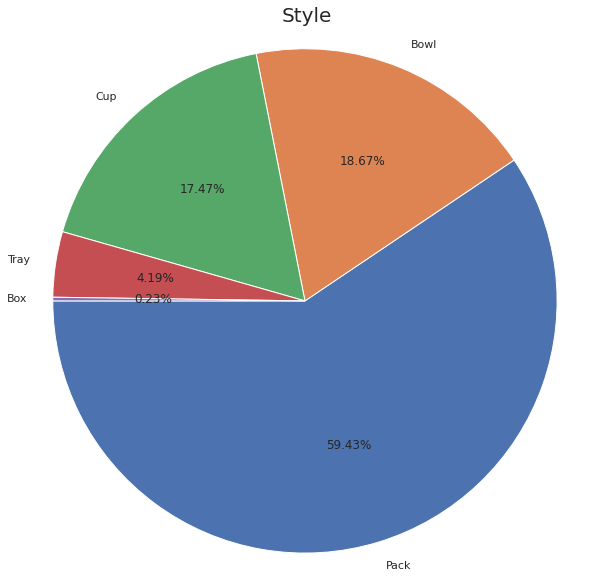

In [54]:
labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box' #We can't include 'Bar' and 'Can' because they only appear once in our data.
size = [1531, 481, 450, 108, 6]

f, ax = plt.subplots(1,1, figsize= (10,10))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Style", size = 20)

plt.show()

## Hypothesis One
H0:  There is no statistically significant difference in the mean star rating between cup and bowl ramen

Ha:  There is a statistically significant difference in the mean star rating between cup and bowl ramen

## t test

In [55]:
stats.ttest_ind(df_bowl['Stars'],df_cup['Stars'], equal_var = False)

Ttest_indResult(statistic=2.506453987828691, pvalue=0.012365028549752646)

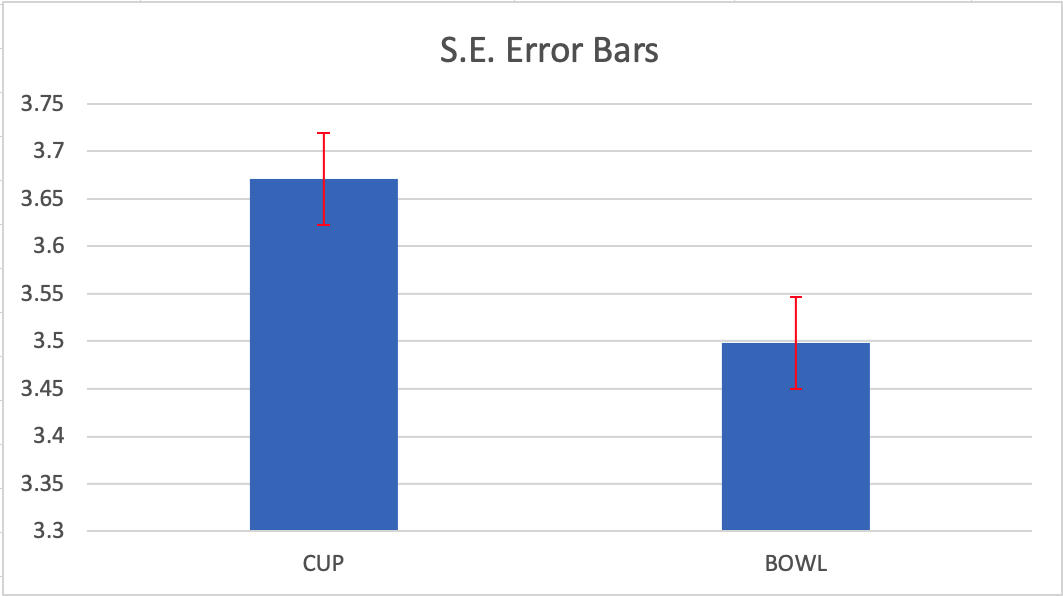

There is statistical significant difference in means at the 0.01 level, so we reject the null hypothesis.

## USA Ratings vs Japan Ratings

## Ratings per Country

In [57]:
df_USA = df[df['Country']=="USA"].copy()
df_USA['Stars'] =pd.to_numeric(df_USA['Stars'])
df_USA.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
11,2569,Yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5.00,NaN
17,2563,Yamachan,Tokyo Shoyu Ramen,Pack,USA,5.00,NaN
21,2559,Jackpot Teriyaki,Beef Ramen,Pack,USA,5.00,NaN
23,2557,Yamachan,Sapporo Miso Ramen,Pack,USA,4.75,NaN


In [58]:
df_Japan = df[df['Country']=="Japan"].copy()
df_Japan['Stars'] = pd.to_numeric(df_Japan['Stars'])
df_USA

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
11,2569,Yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5.00,NaN
17,2563,Yamachan,Tokyo Shoyu Ramen,Pack,USA,5.00,NaN
21,2559,Jackpot Teriyaki,Beef Ramen,Pack,USA,5.00,NaN
23,2557,Yamachan,Sapporo Miso Ramen,Pack,USA,4.75,NaN
...,...,...,...,...,...,...,...
2516,64,Sapporo Ichiban,Chicken Flavor,Pack,USA,3.50,NaN
2546,34,Maruchan,Ramen Noodle Soup Shrimp,Pack,USA,2.00,NaN
2557,23,Nissin,Top Ramen Creamy Chicken,Pack,USA,4.50,NaN
2570,10,Smack,Vegetable Beef,Pack,USA,1.50,NaN


## Visualization: Ratings by Country

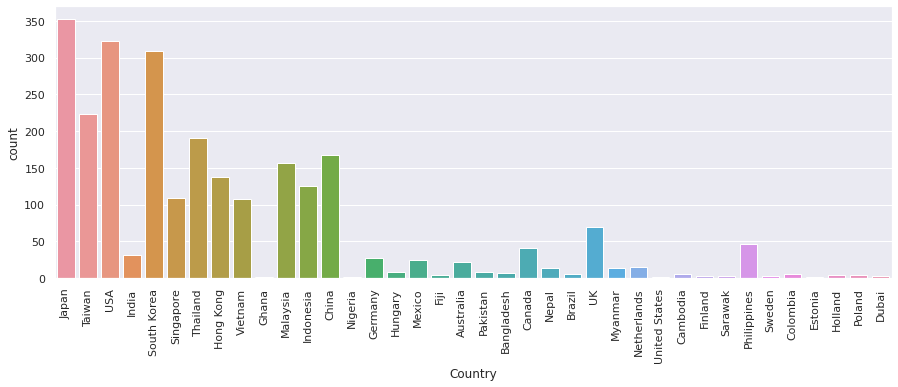

In [56]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (15,5))
sns.countplot(x = 'Country', data = df)
plt.xticks(rotation=90)

plt.show()

In [59]:
df['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Fiji               4
Holland            4
Poland             4
Dubai              3
Sarawak            3
Finland            3
Sweden             3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

## Hypothesis Two

H0:  There is no statistically significant difference in the mean of star ratings between two selected countries (Japan vs. USA)

Ha:  There is a statistically significant difference in the mean of star ratings between two selected countries (Japan vs. USA)


## t test

In [ ]:
stats.ttest_ind(df_USA['Stars'],df_Japan['Stars'], equal_var = False)

Ttest_indResult(statistic=-6.874240416647977, pvalue=1.4837195813145684e-11)

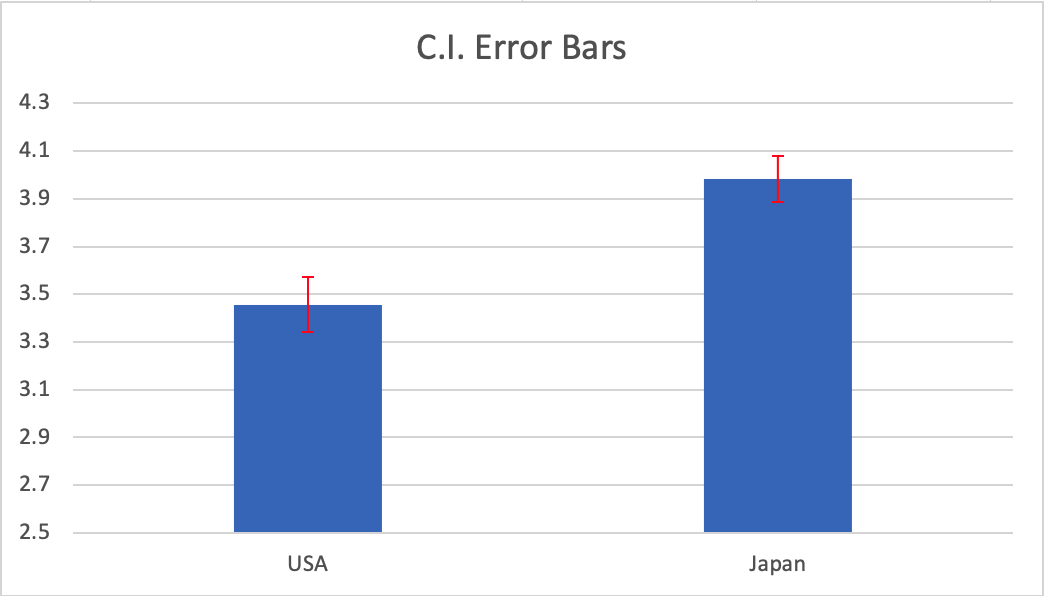

There is statistical significant difference in means at the 0.00 level, so we reject the null hypothesis.